In [4]:
import pandas as pd
import numpy as np
import os
import csv
import time
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import umap

In [5]:
from sklearn.datasets import fetch_20newsgroups
#data = fetch_20newsgroups(subset='all')['data']
data = pd.read_json('../Valerian/Data_sample/quotes-2019-nytimes.json.bz2', lines=True, compression='bz2')

In [6]:
# Perform data encoding before clustering
embedder = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embedder.encode(data['quotation'], show_progress_bar=True)
data_embeddings = embedder.encode(data['quotation'])

Batches:   0%|          | 0/6486 [00:00<?, ?it/s]

In [8]:
# Perform kmean clustering with 20 clusters
num_clusters_20 = 20 #to be determined
clustering_model_20 = KMeans(n_clusters=num_clusters_20)
clustering_model_20.fit(data_embeddings)
cluster_assignment_20 = clustering_model_20.labels_

clustered_sentences_20 = [[] for i in range(num_clusters_20)]
for sentence_id, cluster_id in enumerate(cluster_assignment_20):
    clustered_sentences_20[cluster_id].append(data['quotation'][sentence_id])

In [14]:
for i, cluster in enumerate(clustered_sentences_20):
    print("Cluster ", i+1)
    print(cluster[0:5])
    print("")

Cluster  1
['It is not a low-income immigration,', 'Asylum seekers in Mexico face a heightened risk of kidnapping, disappearance, trafficking, sexual assault, and murder, among other harms,', 'prejudice, the ignorance, the bigotry as well as the attempts of marginalizing toward migrants, particularly Muslims.', 'These are people who have spent their whole lives working for one tribe,', 'We are not looking for people to agree with homosexuality, but to be tolerant.']

Cluster  2
["Our officers' behavior was unacceptable,", 'The allegations against family members are vigorously denied, but to avoid being a distraction for the National Portrait Gallery, we have decided not to proceed at this time with the donation,', 'I made the argument in court that they could not demolish those homes, because they had no place to go,', 'your failure to fulfill minority witness requests shall constitute evidence of your denial of fundamental fairness and due process.', 'The abrupt dismissal comes as Ame

In [11]:
# Perform kmean clustering with 30 clusters
num_clusters_30 = 30 #to be determined
clustering_model_30 = KMeans(n_clusters=num_clusters_30)
clustering_model_30.fit(data_embeddings)
cluster_assignment_30 = clustering_model_30.labels_

clustered_sentences_30 = [[] for i in range(num_clusters_30)]
for sentence_id, cluster_id in enumerate(cluster_assignment_30):
    clustered_sentences_30[cluster_id].append(data['quotation'][sentence_id])

In [15]:
for i, cluster in enumerate(clustered_sentences_30):
    print("Cluster ", i+1)
    print(cluster[0:5])
    print("")

Cluster  1
["I can't pay my electric bill with an i.o.u. I can't pay my mortgage with an i.o.u.,", "When kids are struggling with a trillion and a half dollars in student loan debt, then I've got a problem with billionaires who are not paying their fair share,", 'So the buyer may be particularly vulnerable.', "The Pentagonists: An Insider's View of Waste, Mismanagement and Fraud in Defense Spending", 'Countries at the bottom, like Kazakhstan, United Arab Emirates, Indonesia, have a very strong in-group morality -- it might even be immoral to return the wallet instead of giving the money to your family.']

Cluster  2
["They followed us over there and they saw us in the cage, and when we were walking out, I told them it's too late. They tried to trump our offer, but he honored his commitment.", 'We just had a good chat and laughed about the whole thing.', 'While he was not a teacher or full-time staff member at our school, I was greatly dismayed and disappointed to see this type of behav

In [22]:
model = SentenceTransformer('all-MiniLM-L6-v2')
sentences = clustered_sentences_30[0][0:100]
embeddings_sentences = model.encode(sentences)

#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings_sentences, embeddings_sentences)

#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append([cos_sim[i][j], i, j])

#Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Top-5 most similar pairs:")
for score, i, j in all_sentence_combinations[0:5]:
    print("{} \t {} \t {:.4f}".format(sentences[i], sentences[j], cos_sim[i][j]))

Top-5 most similar pairs:
Billionaires should not exist, 	 Why do billionaires always do this? 	 0.6123
The fact that I know somebody who paid off $98,000 of my student loans makes me just want to go out and just give to people even more than I did before. 	 Why do they want to make interest-free loans to the government? If they just went out and met a noneconomist, they would find that people like 	 0.5540
I have to make money, and this is the best way I can make money. If you're not educated and have a good work ethic, you can come out here and still make six figures. 	 I never thought I'd make this much money, so a number is not going to stop me from working. 	 0.5247
When kids are struggling with a trillion and a half dollars in student loan debt, then I've got a problem with billionaires who are not paying their fair share, 	 The fact that I know somebody who paid off $98,000 of my student loans makes me just want to go out and just give to people even more than I did before. 	 0.

In [23]:
print("Top-5 least similar pairs:")
for score, i, j in all_sentence_combinations[-1:-6:-1]:
    print("{} \t {} \t {:.4f}".format(sentences[i], sentences[j], cos_sim[i][j]))

Top-5 least similar pairs:
This is not the same thing as Social Security. Because college is not for everybody. 	 At the farmer's market this weekend, pick up a couple of extra tomatoes and maybe an extra two million pounds of soybeans. 	 -0.1479
If we let ramps be sold for $2 a pound to someone who will sell them for $30 a pound? 	 This is not the same thing as Social Security. Because college is not for everybody. 	 -0.0988
I don't have any money. I'm just trying to get to work. 	 At the time of the transfer being made to Nissan, it was made clear that any losses would be borne by Mr. Ghosn, 	 -0.0980
A tax on periods is wrong, 	 simply one of numerous other investors in the company and is nothing more than a passive investor, 	 -0.0976
Every time you spend your money, I would argue you're voting, 	 At the time of the transfer being made to Nissan, it was made clear that any losses would be borne by Mr. Ghosn, 	 -0.0897


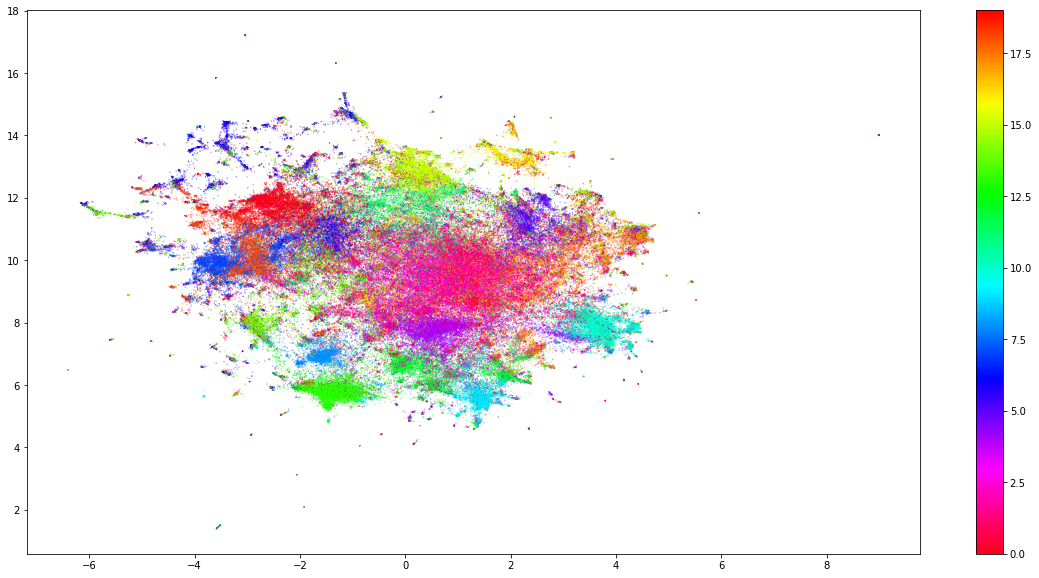

In [10]:
# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = clustering_model_20.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

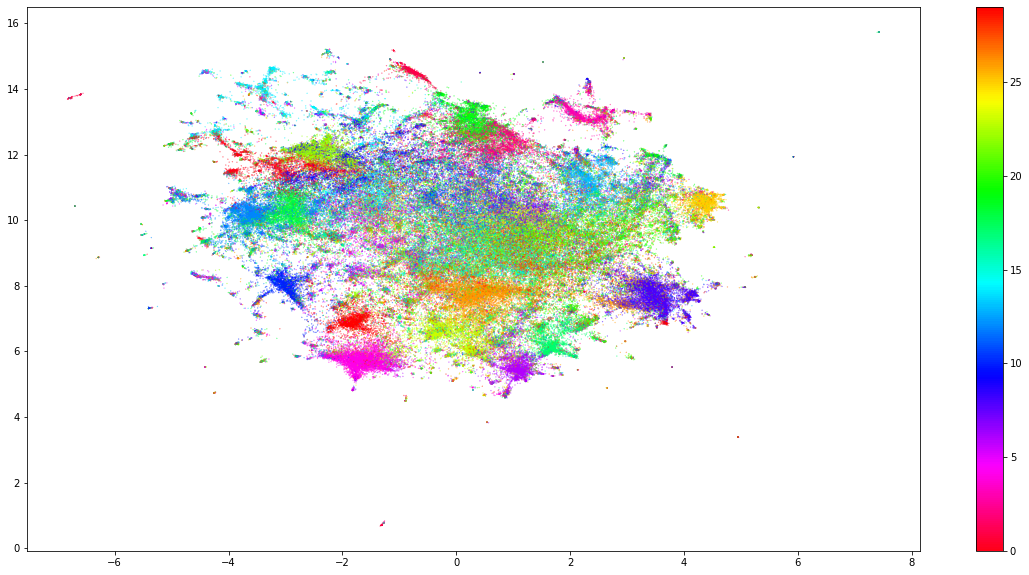

In [12]:
# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = clustering_model_30.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

# Project Milestone2 - Group Concatsanddogs

# The use of women's rights and gender equality rhetoric in the US
 <!---[amina] --->
## Abstract:
<!---[amina] 
 _A 150 word description of the project idea and goals. What’s the motivation behind your project? What story would you like to tell, and why?_ --->
 
The concept of femonationalism, developed by the scholar Sara R. Farris, describes how women’s right and feminism are co-opted to reinforce nationalist discourses. The femonationalist ideological formation uses arguments to bring forwards anti-immigration, anti-Muslim and xenophobic ideas and policies. In her book [1], Sara R. Farris uses discourse analysis of right-wing parties, feminist intellectuals and democrats* to demonstrate her argument. Her analysis focuses on Italy, Netherlands and France where she highlights the main topics of the ideology. First, the opposition between the non-western man who is an oppressor versus the non-western women who is a redeemable victim to save and secondly the belief that patriarchy is only existing in non-western cultures.
In our case, we are interested in using quotations from The Quotebank database to study the use of women's rights and gender equality rhetoric in US. Especially, we are focusing on investigating if similar conclusions can be drawn.
 
*A female politician or senior civil servant; a female bureaucrat in an agency dealing with women's issues.  

[1] Farris, S. (2017). *In the Name of Women’s Rights*. Duke University Press. Retrieved from
[link]( https://www.perlego.com/book/1465722/in-the-name-of-womens-rights-pdf)  (Original work published 2017)

## Research Questions:
 <!---[amina]
_A list of research questions you would like to address during the project._ --->
We are focusing on research questions 1-3 (RQ 1-3) which have precise objective meanwhile RQ4 is an open-ended exploration if we have time.

- RQ1: What?   
How often "women's right" and "gender equality" ideas are quoted along with some mentions of immigration policies, of racial groups or low-wages workers status or religion (i.e. how often women's right are invoked in a femonationalist context)?
or
Can we identify different contexts for women's rights quotations? Can we relate one or multiple of these contexts to femonationalist rhetoric?
(#RQ1 two suggestions are the same research question but approached once with a top-to-bottom approach and once with a bottom-to-top approach. In the first one we know the criteria and use them to define what are femonationalist quotes, in the second we cluster the quotes and see if the criteria emerge from the cluster.

- RQ2: Who?  
 Is there a relationship between the association of women's right and elements of nationalist rhetoric and the speaker political orientation? 
Is there a relationship between the femonationalist use of women's right rhetoric and speaker gender?

- RQ3: When?   
What is the time distribution of the femonationalist quotations ? Is there a relation between the femonationalist quotations and major political events (i.e. bombing in US, mass shooting, vote on feminist topics..)

- RQ4   
What is the sentiment analysis of the context of the quotation containing women's right mention ?
Can we link the sentiment to the use of women's rights ideology?

## Proposed additional datasets (if any): 
 <!---[amina] ---> 
 - Articles content and Keywords: These two text files contains the article retrieved from usnews.com and the list of most frequent bigrams that we will use as keywords.
 
 <!---[younes] ---> 
 - Parquet files and QIDS : Samples of the Wikidata knowledgebase will be used to translate QID items in the dataset to readable labels . After selecting what quotes we will work on, using the provided .parquet file and json we will load the corresponding attributes to each speaker. Some attributes such as the political party could be used in our analyses. Since multiple QIDs are given for the political party we might extract the date for each term, and only keep the one the one relevant to the quote. 
 
 <!---_List the additional dataset(s) you want to use (if any), and some ideas on how you expect to get, manage, process, and enrich it/them. Show us that you’ve read the docs and some examples, and that you have a clear idea on what to expect. Discuss data size and format if relevant. It is your responsibility to check that what you propose is feasible._---> 

## Methods
 <!---[amina] --->
 - Webscraping : To scrape news websites and extract keywords related to women's right topic we use python libraries that parse html tree (*BeautifulSoup*) and natural language processing (*NLTK*) to get most frequent bigrams. The format of the website has to be manually inspected to define the relevant tag contents. In our case, two tags identifying the column of interest in the primary website page as well as a tag to identify the article itself, its secondary pages are manually determined. The articles content is cleaned with regular expressions to keep only the relevant part of the text (e.g. copyright ignored).  
 
 <!---[valerian] --->
 -  Clustering : To identify topics within our data and group our quotes according to the topic, we use k-mean clustering. This method takes in the quotes chosen and the number of clusters we wish to form to label the data. 
 We then visualize the data using Umap, a module which reduces the dimension of the problem to be able to plot the results. We can also quantify the similarity between to sentences of a cluster using cosine similarity.
 
 <!---[younes] --->  
 - Sentiment analysis :  Polarity scores from VaderSentiment library ( in the NLTK library) could be used to give a metric on positivity or negativity of a quote. The VaderSentiment tool has been created to work best on social media contents, which is appropriate as we are dealing with short texts.
 
 <!---[younes] --->   
 - QID to attributes & QID to readable labels :   From a dataframe containing the chosen quotes, the QID row ( only the first QID if many are available) is used to perform a left join with the a dataframe from the "speaker_attributes.parquet". Since some labels are still in QID format another join is performed between the remaining QIDs and "wikidata_labels_descriptions_quotebank.csv.bz2" . Code has been prepared to perform the same join but using chunks with the file containing all the wikidata labels ( "wikidata_labels_descriptions.csv.bz2") in case some QID weren't available in the quotebank version. 
 <!---   
* **Step 2** - 
Sbert, topic modeling [link 1](https://www.sbert.net/examples/applications/clustering/README.html#topic-modeling)
Short text topic modeling : [link 2](https://towardsdatascience.com/short-text-topic-modeling-70e50a57c883) ( not sure this will work because data maybe needs to be " smooth"

  - URLS : using NY times or similar websites to find text categories
  - N-grams : check frequency of N-grams / N-skip grams will need a dozen or more N-grams
  - NLTK / spacey : NLTK easier to use
  - Pattern matching : library re - regular expressions
  - LDA (only for long texts, not likely to work)
---> 
 
## Proposed timeline : weekly
<!---_A list of internal milestones up until project Milestone 3._ --->
- 9 : Get feedback and review P2 and potentially modify timeline 
- 10 : Have a result and plot for every question - start interpreting
- 11 : Combine the results and sketch website with visualizations - finish notebook
- 12 : Continue website - write text accompanying visualizations
- 13 : Run all the code and visualizations one last time - Finalize website 

## Organization within the team (subject to change):
Amina : Webscraping, Research papers, Selecting the quotes, results Interpretation
Galann : Website, Visualisation, results Interpretation
Valérian : Clustering/topic analysis, results Interpretation
Younes : Sentiment analysis, Enriching the data, results Interpretation

## Questions for TAs :
<!---(optional): Add here any questions you have for us related to the proposed project.--->
 <!---[amina] --->
- Webscraping : Should we put, or refine the webscraping or is it out of the scope of the project? In case we should, which one of these seems the most appropriate refinement. Increase the set of articles implementing infinite scrolling? Increase the set of articles by adding other newspaper websites? Get rid of the Named Entities through NE recognition library?
<!---[younes] --->
- We tried to perform a join using Dask but it ended being slower than pandas, which aligns with what is said in their documentation. We are wondering wether Dask is worth the effort, can be used for specific operations, or is it not worth it with a consumer laptop as ours?

## Folder structure : 

**Folders description:**
*  `data` : contains the Quote-bank data from 2015 to 2020, as it was found in the google Drive
*  `generated_data` : data files that have been generated from the original quotebank data
*  `additional_datasets`: other datasets used in our analyses
<!---*  `documents` : contains reasearch papers and literature around our project ideas--->
*  `scripts` : contains all .py files implementing methods used in the main 

**Notebooks:**

* `Milestone_2_Main_notebook` : Notebook containing our main pipelines

<!---
* `Main_notebook_COLAB` : google COLAB version of the main notebook ( some of code is different )
* `Test_notebook` : secondary notebook used for testing code on the project milestone 1 sample before testing on the larger samples because it is faster ( Note that test_notebook needs quotes-2019-nytimes.json and quotes-2019-nytimes.json.bz2 to be in the `generated_data` folder)
--->